In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
from PIL import Image
from tqdm import tqdm
import os
import math

# test all 2020

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / (y_test+1e-17))) * 100 

path="D:/npz"
list=os.listdir(f"{path}/2020")
models=[]
models.append(keras.models.load_model('my_model_test_100_binary_crossentropy_0.001.h5'))
models.append(keras.models.load_model('my_model_test_100_3_mse.h5'))

In [5]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인
total=[]
for k in range(2):
    mse_list=[]
    mape_list=[]
    mae_list=[]
    for i in tqdm(list):
        x_test = np.load(f"{path}/2020/{i}")['x']
        for target in range(18):
            for idx in range(6):
                a=np.expand_dims(x_test[target+idx],axis=0)
                prd=models[k].predict(a)
                if idx==0:
                    predict=np.expand_dims(prd[0][-1],axis=0)
                else:
                    predict=np.concatenate((predict,np.expand_dims(prd[0][-1],axis=0)),axis=0)
            original=x_test[target+5]

            mse=mean_squared_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
            # mape=mean_absolute_percentage_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))/(302 *176* 3)
            mape=MAPE(original,predict)
            mae=mean_absolute_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
            mse_list.append(mse)
            mape_list.append(mape)
            mae_list.append(mae)
    #모델의 총 메트릭
    mse=sum(mse_list)/len(mse_list)
    mape=sum(mape_list)/len(mape_list)
    mae=sum(mae_list)/len(mae_list)
    total.append([mse,mape,mae])

 64%|██████▎   | 7/11 [04:37<02:38, 39.67s/it]


KeyboardInterrupt: 

mse : 0.007492725539905778 , mape : 5.017324295358447e+16 , mae : 0.059064997663850836
mse : 0.472404965778945 , mape : 91.9338182464353 , mae : 0.5936606602972985
mse : 0.004291538123076282 , mape : 5.8520554786182824e+16 , mae : 0.04469046319914238


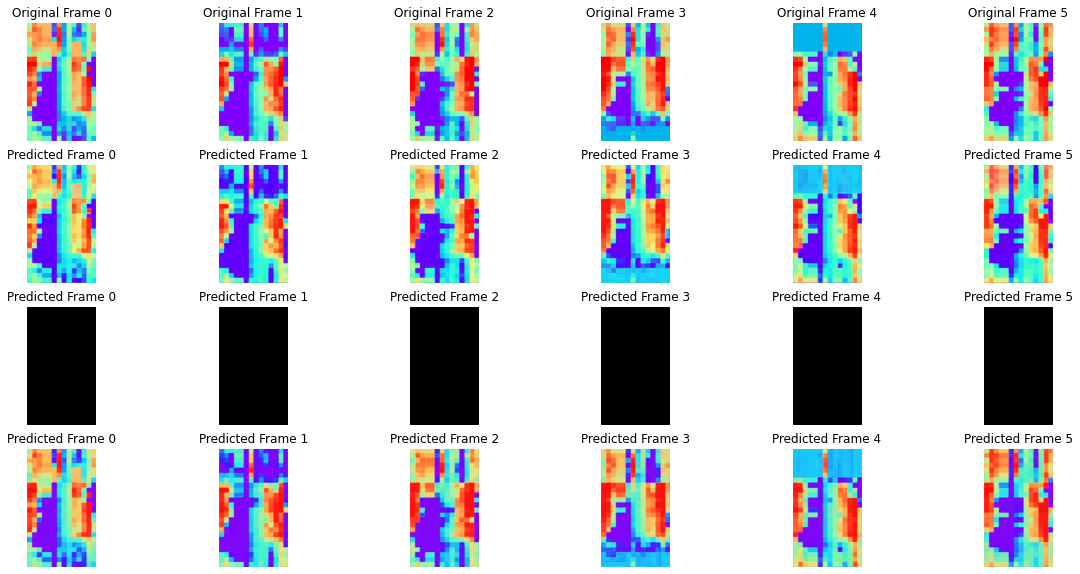

In [185]:
# 모든 모델 훈련시킨걸로 확인하기
x_test = np.load(f"{path}/batch/x/1.npz")['x']
target=17 # 
originals=[]
predicts=[]
for i in range(3):
    for idx in range(6):
        a=np.expand_dims(x_test[target+idx], axis=0)
        prd=models[i].predict(a)
        # print(idx,a.shape,prd.shape)\
        if idx==0:
            predict=np.expand_dims(prd[0][-1],axis=0)
        else:
            predict = np.concatenate((predict, np.expand_dims(prd[0][-1],axis=0)), axis=0)
    original=x_test[target+5]
    
    #
    mse=mean_squared_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
    # mape=mean_absolute_percentage_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))/(302 *176* 3)
    mape=MAPE(original,predict)
    mae=mean_absolute_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
    print(f"mse : {mse} , mape : {mape} , mae : {mae}")
    #모든 모델 확인하기 위해 리스트에 저장
    originals.append(original)
    predicts.append(predict)


fig, axes = plt.subplots(4, 6, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(original[idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(3):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")



mse : 0.007161912935623374 , mape : 2.0838734526300584e+16 , mae : 0.058052494154582135
mse : 0.49224361481799866 , mape : 94.73508996348141 , mae : 0.6216620373649492
mse : 0.003417863385330006 , mape : 2.781928757682699e+16 , mae : 0.040604996504091086


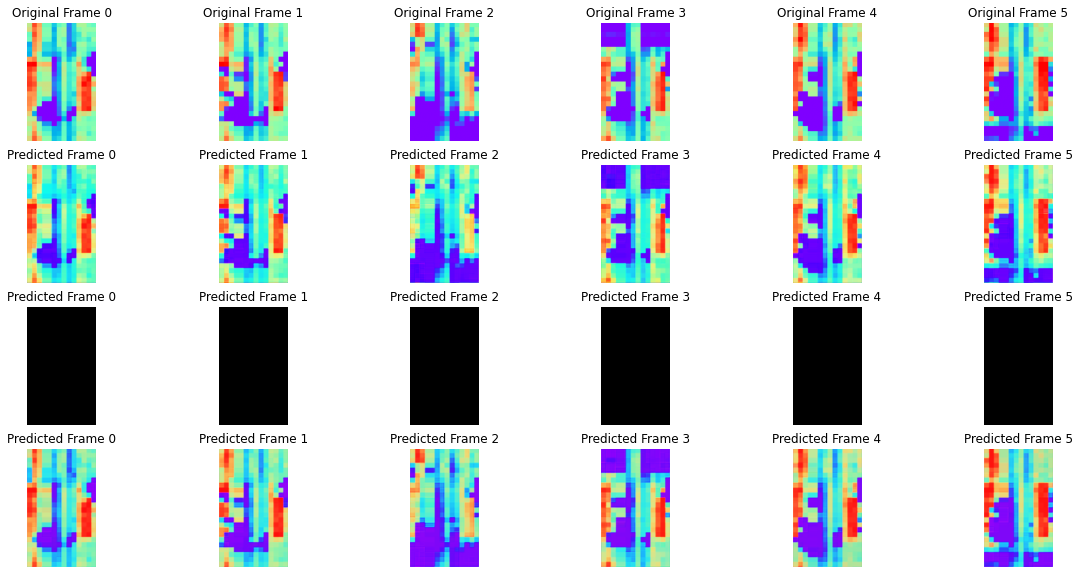

In [190]:
# 모든 모델 새로운데이터로 확인하기
x_test = np.load(f"{path}/2020/1.npz")['x']
target=5 # 
originals=[]
predicts=[]
for i in range(3):
    for idx in range(6):
        a=np.expand_dims(x_test[target+idx], axis=0)
        prd=models[i].predict(a)
        # print(idx,a.shape,prd.shape)\
        if idx==0:
            predict=np.expand_dims(prd[0][-1],axis=0)
        else:
            predict = np.concatenate((predict, np.expand_dims(prd[0][-1],axis=0)), axis=0)
    original=x_test[target+5]
    
    #
    mse=mean_squared_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
    # mape=mean_absolute_percentage_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))/(302 *176* 3)
    mape=MAPE(original,predict)
    mae=mean_absolute_error(original.reshape(6,302 *176* 3),predict.reshape(6,302 *176* 3))
    print(f"mse : {mse} , mape : {mape} , mae : {mae}")
    #모든 모델 확인하기 위해 리스트에 저장
    originals.append(original)
    predicts.append(predict)


fig, axes = plt.subplots(4, 6, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(original[idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(3):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")

In [50]:
def compute_metrics(s,e):
    t=12.58
    start=round(t * s)
    end=round(t*e)
    y=original[:,start:end,:,:]
    y_pred=predict[:,start:end,:,:]
    mse=mean_squared_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
    mape=MAPE(y,y_pred)
    mae=mean_absolute_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
    return np.array([mse,mape,mae])

In [51]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인

total=[]
for k in range(2):
    before_list=[]
    after_list=[]
    peak_list=[]
    rest_list=[]
    # for i in tqdm(list):
    x_test = np.load(f"{path}/2020/2.npz")['x']
    for target in range(18):
        for idx in range(6):
            a=np.expand_dims(x_test[target+idx],axis=0)
            prd=models[k].predict(a)
            if idx==0:
                predict=np.expand_dims(prd[0][-1],axis=0)
            else:
                predict=np.concatenate((predict,np.expand_dims(prd[0][-1],axis=0)),axis=0)
        original=x_test[target+5]
        #before peak hour - 7~12
        before=compute_metrics(7,12)
        #peak 12~19
        peak=compute_metrics(12,19)
        #after 19~21
        after=compute_metrics(19,21)
        #rest 22~24 , 0~6
        t=12.58
        start=round(t * 21)
        end=round(t*24)
        y=original[:,start:end,:,:]
        y_pred=predict[:,start:end,:,:]
        start=round(t * 0)
        end=round(t*7)
        # 22~24 0~6 시간대 합치기
        y=np.concatenate((y,original[:,start:end,:,:]),axis=1)
        y_pred=np.concatenate((y_pred,predict[:,start:end,:,:]),axis=1)
        
        mse=mean_squared_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
        mape=MAPE(y,y_pred)
        mae=mean_absolute_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
        
        rest=[mse,mape,mae]
        
        before_list.append(before)
        after_list.append(after)
        peak_list.append(peak)
        rest_list.append(rest)


    total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
total=np.array(total)

[array([[[7.02096335e-03, 4.23691589e+16, 5.73239097e-02],
         [7.20683280e-03, 4.29162040e+16, 5.79327268e-02],
         [6.96434839e-03, 3.97123227e+16, 5.72741434e-02],
         [7.02693144e-03, 2.82556314e+16, 5.74463167e-02],
         [6.98465130e-03, 4.37895223e+16, 5.70909450e-02],
         [6.61558594e-03, 4.32454826e+16, 5.55781591e-02],
         [7.18181285e-03, 4.54497036e+16, 5.80130308e-02],
         [7.44006962e-03, 5.20141148e+16, 5.92097194e-02],
         [7.46328978e-03, 4.80449357e+16, 5.93269097e-02],
         [7.38507595e-03, 4.02131811e+16, 5.92108524e-02],
         [7.51972612e-03, 2.52773002e+16, 5.99429266e-02],
         [7.41867490e-03, 3.94433247e+16, 5.98296814e-02],
         [6.81621857e-03, 3.99867230e+16, 5.69925002e-02],
         [6.73494948e-03, 3.54937066e+16, 5.70853133e-02],
         [6.78404235e-03, 3.98415411e+16, 5.72954798e-02],
         [7.05991709e-03, 3.94718610e+16, 5.84165234e-02],
         [7.23703108e-03, 3.60307179e+16, 5.90447035e-02

In [65]:
# mse,mape,mae
print("before")
print(np.mean(total[0][0],axis=0))
print("peak")
print(np.mean(total[0][1],axis=0))
print("after")
print(np.mean(total[0][2],axis=0))
print("rest")
print(np.mean(total[0][3],axis=0))

print("before")
print(np.std(total[0][0],axis=0))
print("peak")
print(np.std(total[0][1],axis=0))
print("after")
print(np.std(total[0][2],axis=0))
print("rest")
print(np.std(total[0][3],axis=0))

before
[7.12294298e-03 3.92526843e+16 5.81142039e-02]
peak
[6.67136979e-03 1.42219949e+16 5.59551292e-02]
after
[6.22585848e-03 2.22878937e+16 5.50550021e-02]
rest
[6.12048986e-03 8.09580717e+15 5.77884915e-02]
before
[2.67824745e-04 7.00960890e+15 1.16102176e-03]
peak
[2.81852718e-04 3.64701414e+15 9.36835605e-04]
after
[2.59076854e-04 2.71095570e+15 9.71172965e-04]
rest
[3.15510312e-04 2.82758780e+15 1.42700872e-03]


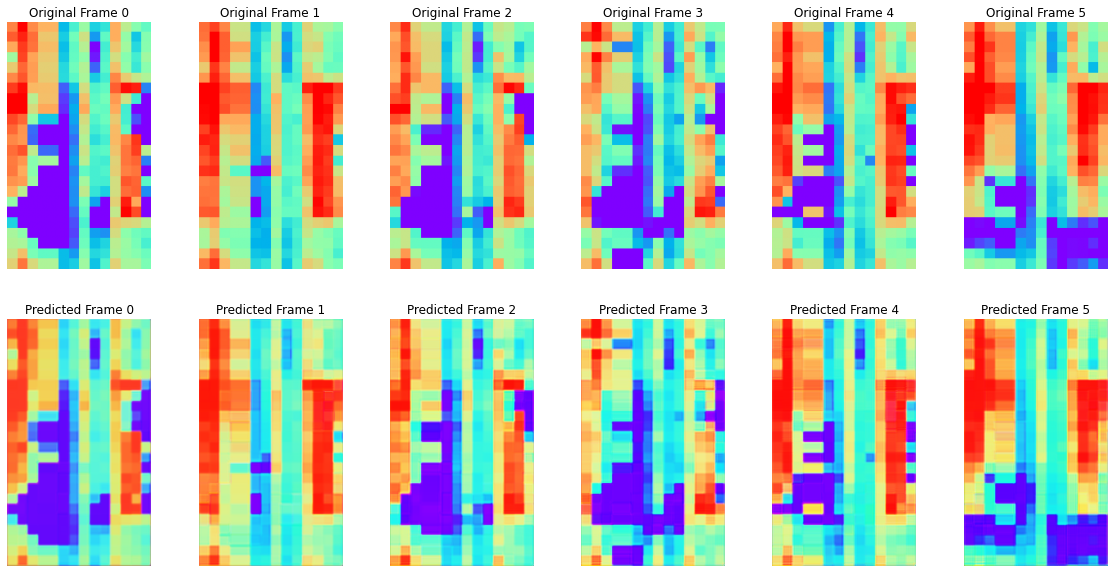

In [27]:
# 그냥 1개넣어서 한프레임 뒤에 예측

xx=np.expand_dims(x_test[5], axis=0)
y_test=np.expand_dims(x_test[5], axis=0)



predict = model.predict(xx)

fig, axes = plt.subplots(2, 6, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(y_test[0][idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")



for idx, ax in enumerate(axes[1]):
    ax.imshow(predict[0][idx])
    ax.set_title(f"Predicted Frame {idx}")
    ax.axis("off")